In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

from src.preprocess.mt5_var_preprocess import load_preprocess_usdjpym20




# In [5]: csv 경로 지정
csv_path = "/Users/gy/projects/trading-project/data_raw/usdjpym20_20251117_035207.csv"

# In [6]: 전처리 (log_close + 7개 지표, DatetimeIndex 포함)
df_raw = load_preprocess_usdjpym20(csv_path)

# df_var 구조 확인 (선택)
print(df_raw.head())
print(df_raw.columns)
print(type(df_raw.index))   # DatetimeIndex 인지 확인


                     log_close   bbpb_20    bbpb_4    bbw_20     bbw_4  \
datetime                                                                 
2025-05-19 04:00:00   4.977209  0.242272  0.293611  0.943049  0.745403   
2025-05-19 04:20:00   4.977485  0.293157  0.492417  0.912327  0.659066   
2025-05-19 04:40:00   4.977575  0.323211  0.582218  0.876795  0.509412   
2025-05-19 05:00:00   4.977354  0.317914  0.599567  0.827705  0.507200   
2025-05-19 05:20:00   4.977768  0.387192  0.454003  0.726770  0.108630   

                        dp_14  Signal    Average  
datetime                                          
2025-05-19 04:00:00 -0.104521   39.24  58.755714  
2025-05-19 04:20:00 -0.050528   39.43  58.324286  
2025-05-19 04:40:00 -0.031983   39.30  57.997143  
2025-05-19 05:00:00 -0.043304   39.43  57.774286  
2025-05-19 05:20:00  0.012599   38.90  58.054286  
Index(['log_close', 'bbpb_20', 'bbpb_4', 'bbw_20', 'bbw_4', 'dp_14', 'Signal',
       'Average'],
      dtype='object')
<cla

In [19]:
data = df_raw.diff().dropna()

model = VAR(data)

results = model.fit(2)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Nov, 2025
Time:                     12:50:09
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -45.9432
Nobs:                     9356.00    HQIC:                  -46.0117
Log likelihood:           109339.    FPE:                1.00472e-20
AIC:                     -46.0470    Det(Omega_mle):     9.90231e-21
--------------------------------------------------------------------
Results for equation log_close
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000007         0.000006            1.151           0.250
L1.log_close        -0.130191         0.135279           -0.962           0.336
L1.bbpb_20           0.000128         0.000062            2.

/Users/gy/projects/trading-project/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


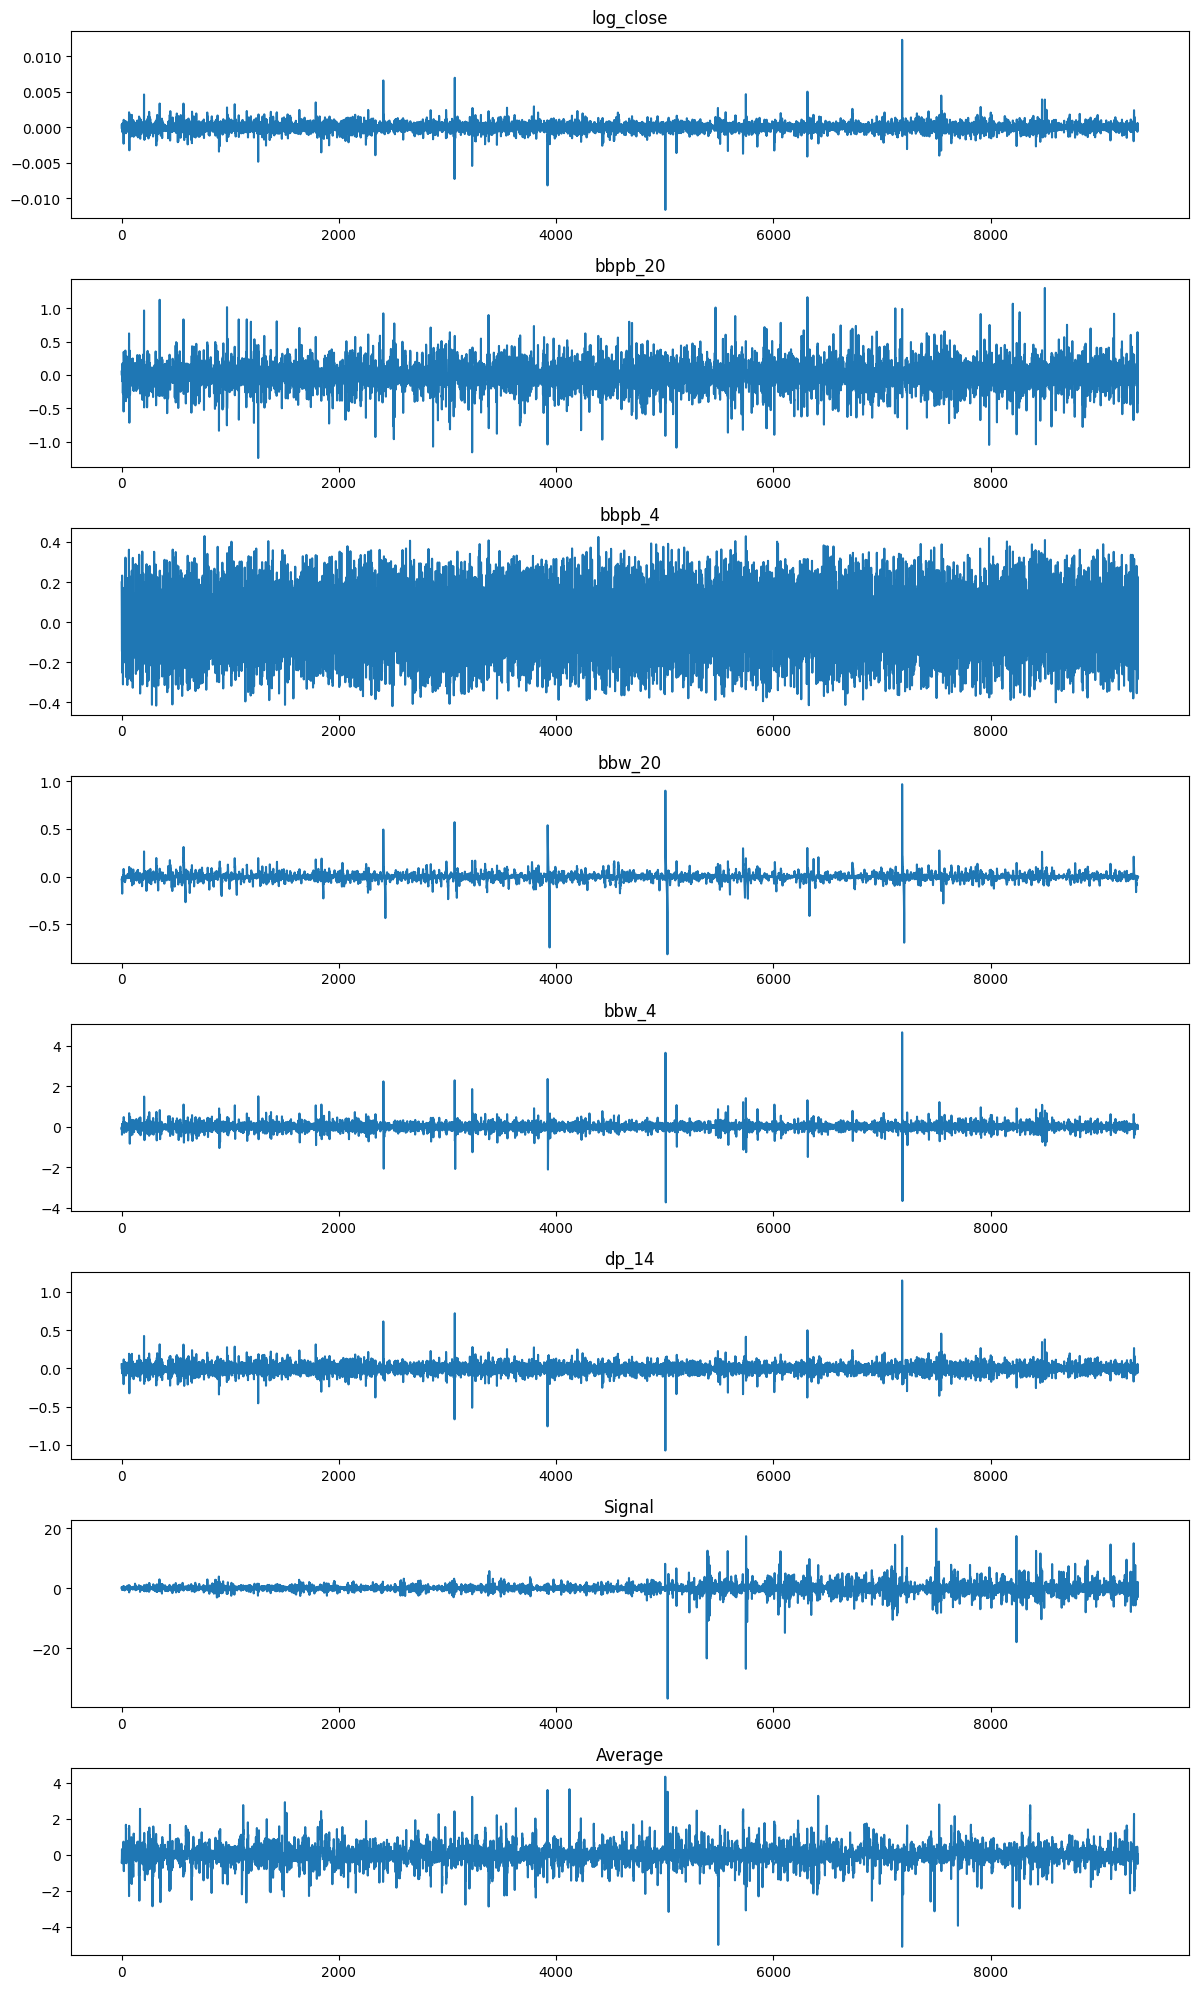

In [35]:
fig = results.plot()          # 결과를 변수에 받기
fig.set_size_inches(12, 20)    # 그림 크기 키우기
fig.tight_layout()            # 여백 정리

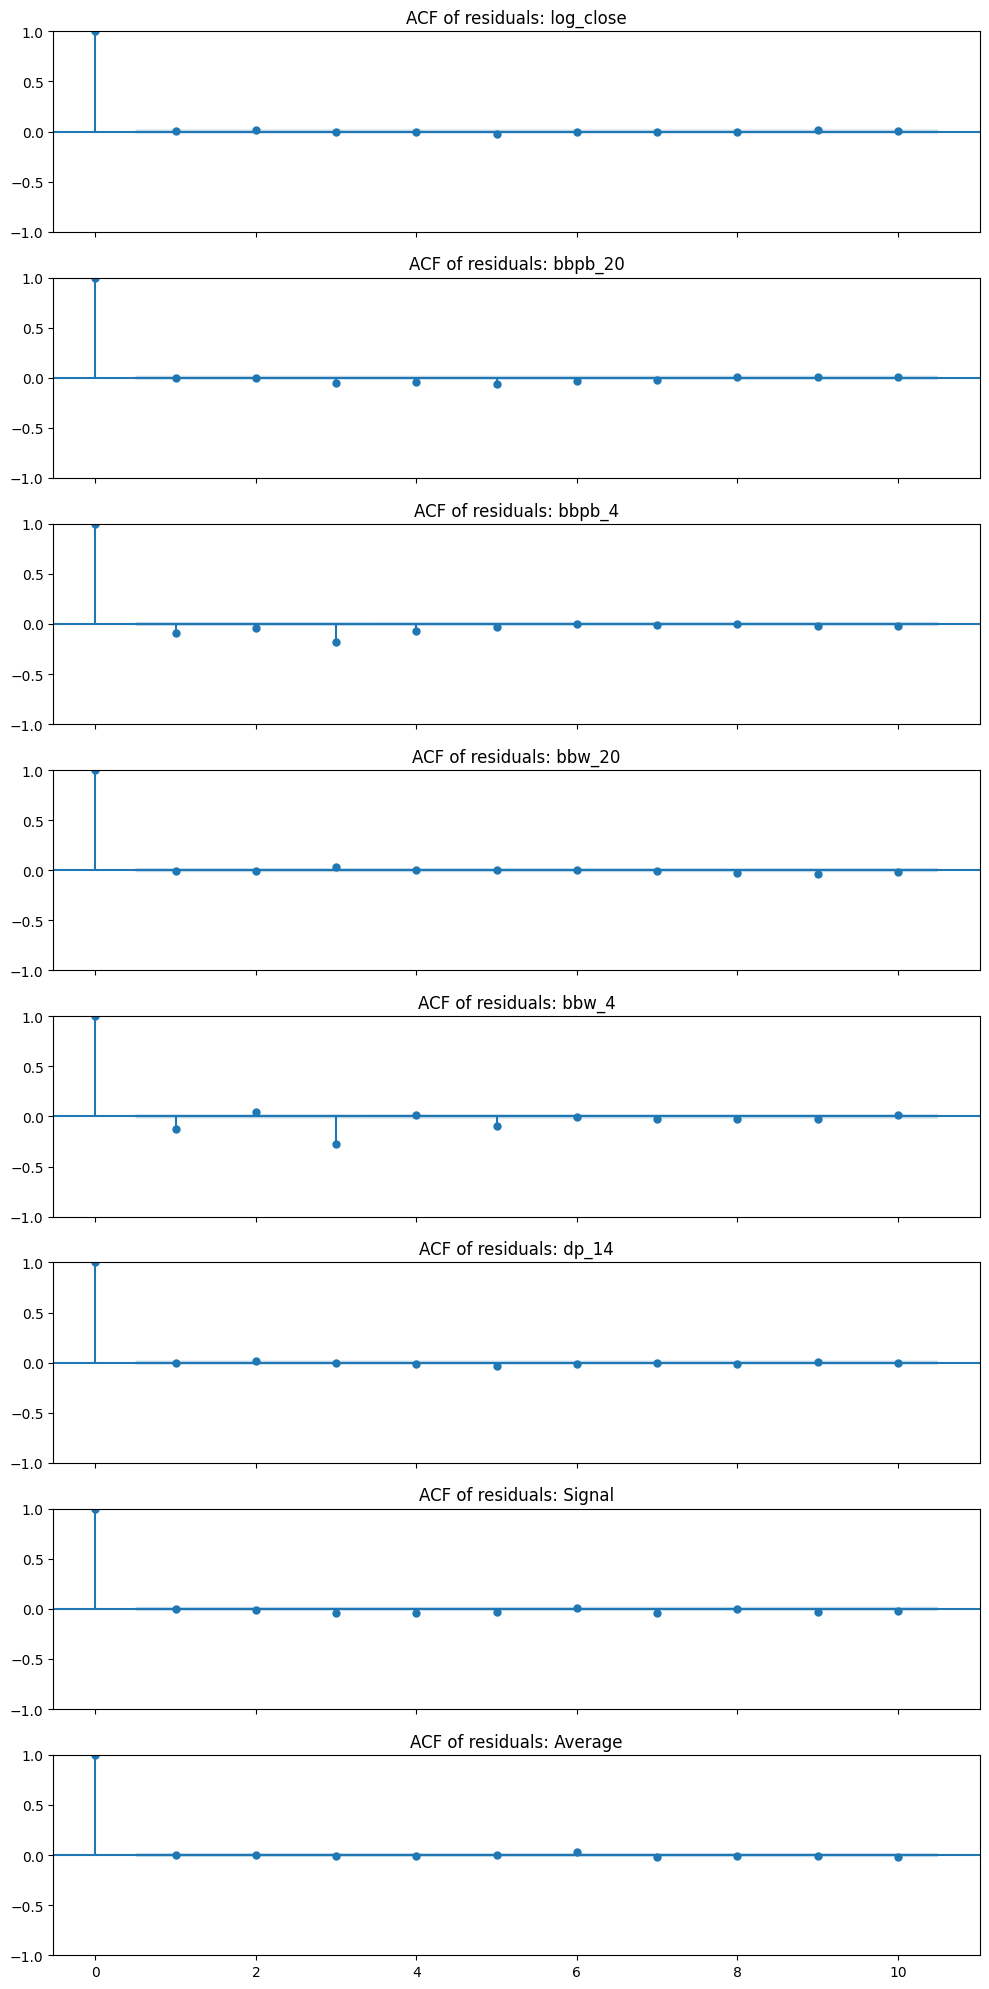

In [32]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

# VAR 잔차를 DataFrame으로
resid = pd.DataFrame(results.resid, columns=results.names)

k = resid.shape[1]
fig, axes = plt.subplots(k, 1, figsize=(10, 2.5 * k), sharex=True)

for i, col in enumerate(resid.columns):
    ax = axes[i] if k > 1 else axes
    plot_acf(resid[col], lags=10, ax=ax)
    ax.set_title(f"ACF of residuals: {col}")

plt.tight_layout()


In [ ]:
# 여기서부터는 매크로 예제와 동일하게 진행 가능
# 예시:
# In [9]:
# lag 선택
sel = model.select_order(maxlags=20)
print(sel.summary())

# In [10]: AIC 기준 lag 선택 후 적합
lag = sel.selected_orders["aic"]
res = model.fit(lag)

# In [11]: IRF / FEVD
irf = res.irf(20)
fevd = res.fevd(20)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Nov, 2025
Time:                     11:56:37
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -45.9432
Nobs:                     9356.00    HQIC:                  -46.0117
Log likelihood:           109339.    FPE:                1.00472e-20
AIC:                     -46.0470    Det(Omega_mle):     9.90231e-21
--------------------------------------------------------------------
Results for equation log_close
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000007         0.000006            1.151           0.250
L1.log_close        -0.130191         0.135279           -0.962           0.336
L1.bbpb_20           0.000128         0.000062            2.

In [21]:
sel = model.select_order(maxlags=20)
print(sel.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -41.30      -41.30   1.153e-18      -41.30
1       -45.71      -45.65   1.409e-20      -45.69
2       -46.05      -45.94   1.006e-20      -46.01
3       -46.35      -46.20   7.405e-21      -46.30
4       -46.45      -46.25   6.707e-21      -46.38
5       -46.55      -46.30   6.100e-21      -46.46
6       -46.63      -46.33   5.635e-21      -46.52
7       -46.70      -46.35   5.251e-21      -46.58
8       -46.78      -46.38   4.816e-21      -46.65
9       -46.91      -46.46   4.256e-21      -46.75
10      -47.03      -46.53   3.768e-21      -46.86
11      -47.15      -46.60   3.340e-21      -46.96
12      -47.95      -47.36   1.491e-21      -47.75
13      -54.14      -53.50   3.061e-24      -53.93
14      -54.28      -53.59   2.674e-24      -54.04
15      -54.43      -53.69   2.288e-24      -54.18
16      -54.51     -53.72*   2.

In [22]:
lag = sel.selected_orders["aic"]
res = model.fit(lag)

In [23]:
irf = res.irf(20)
fevd = res.fevd(20)

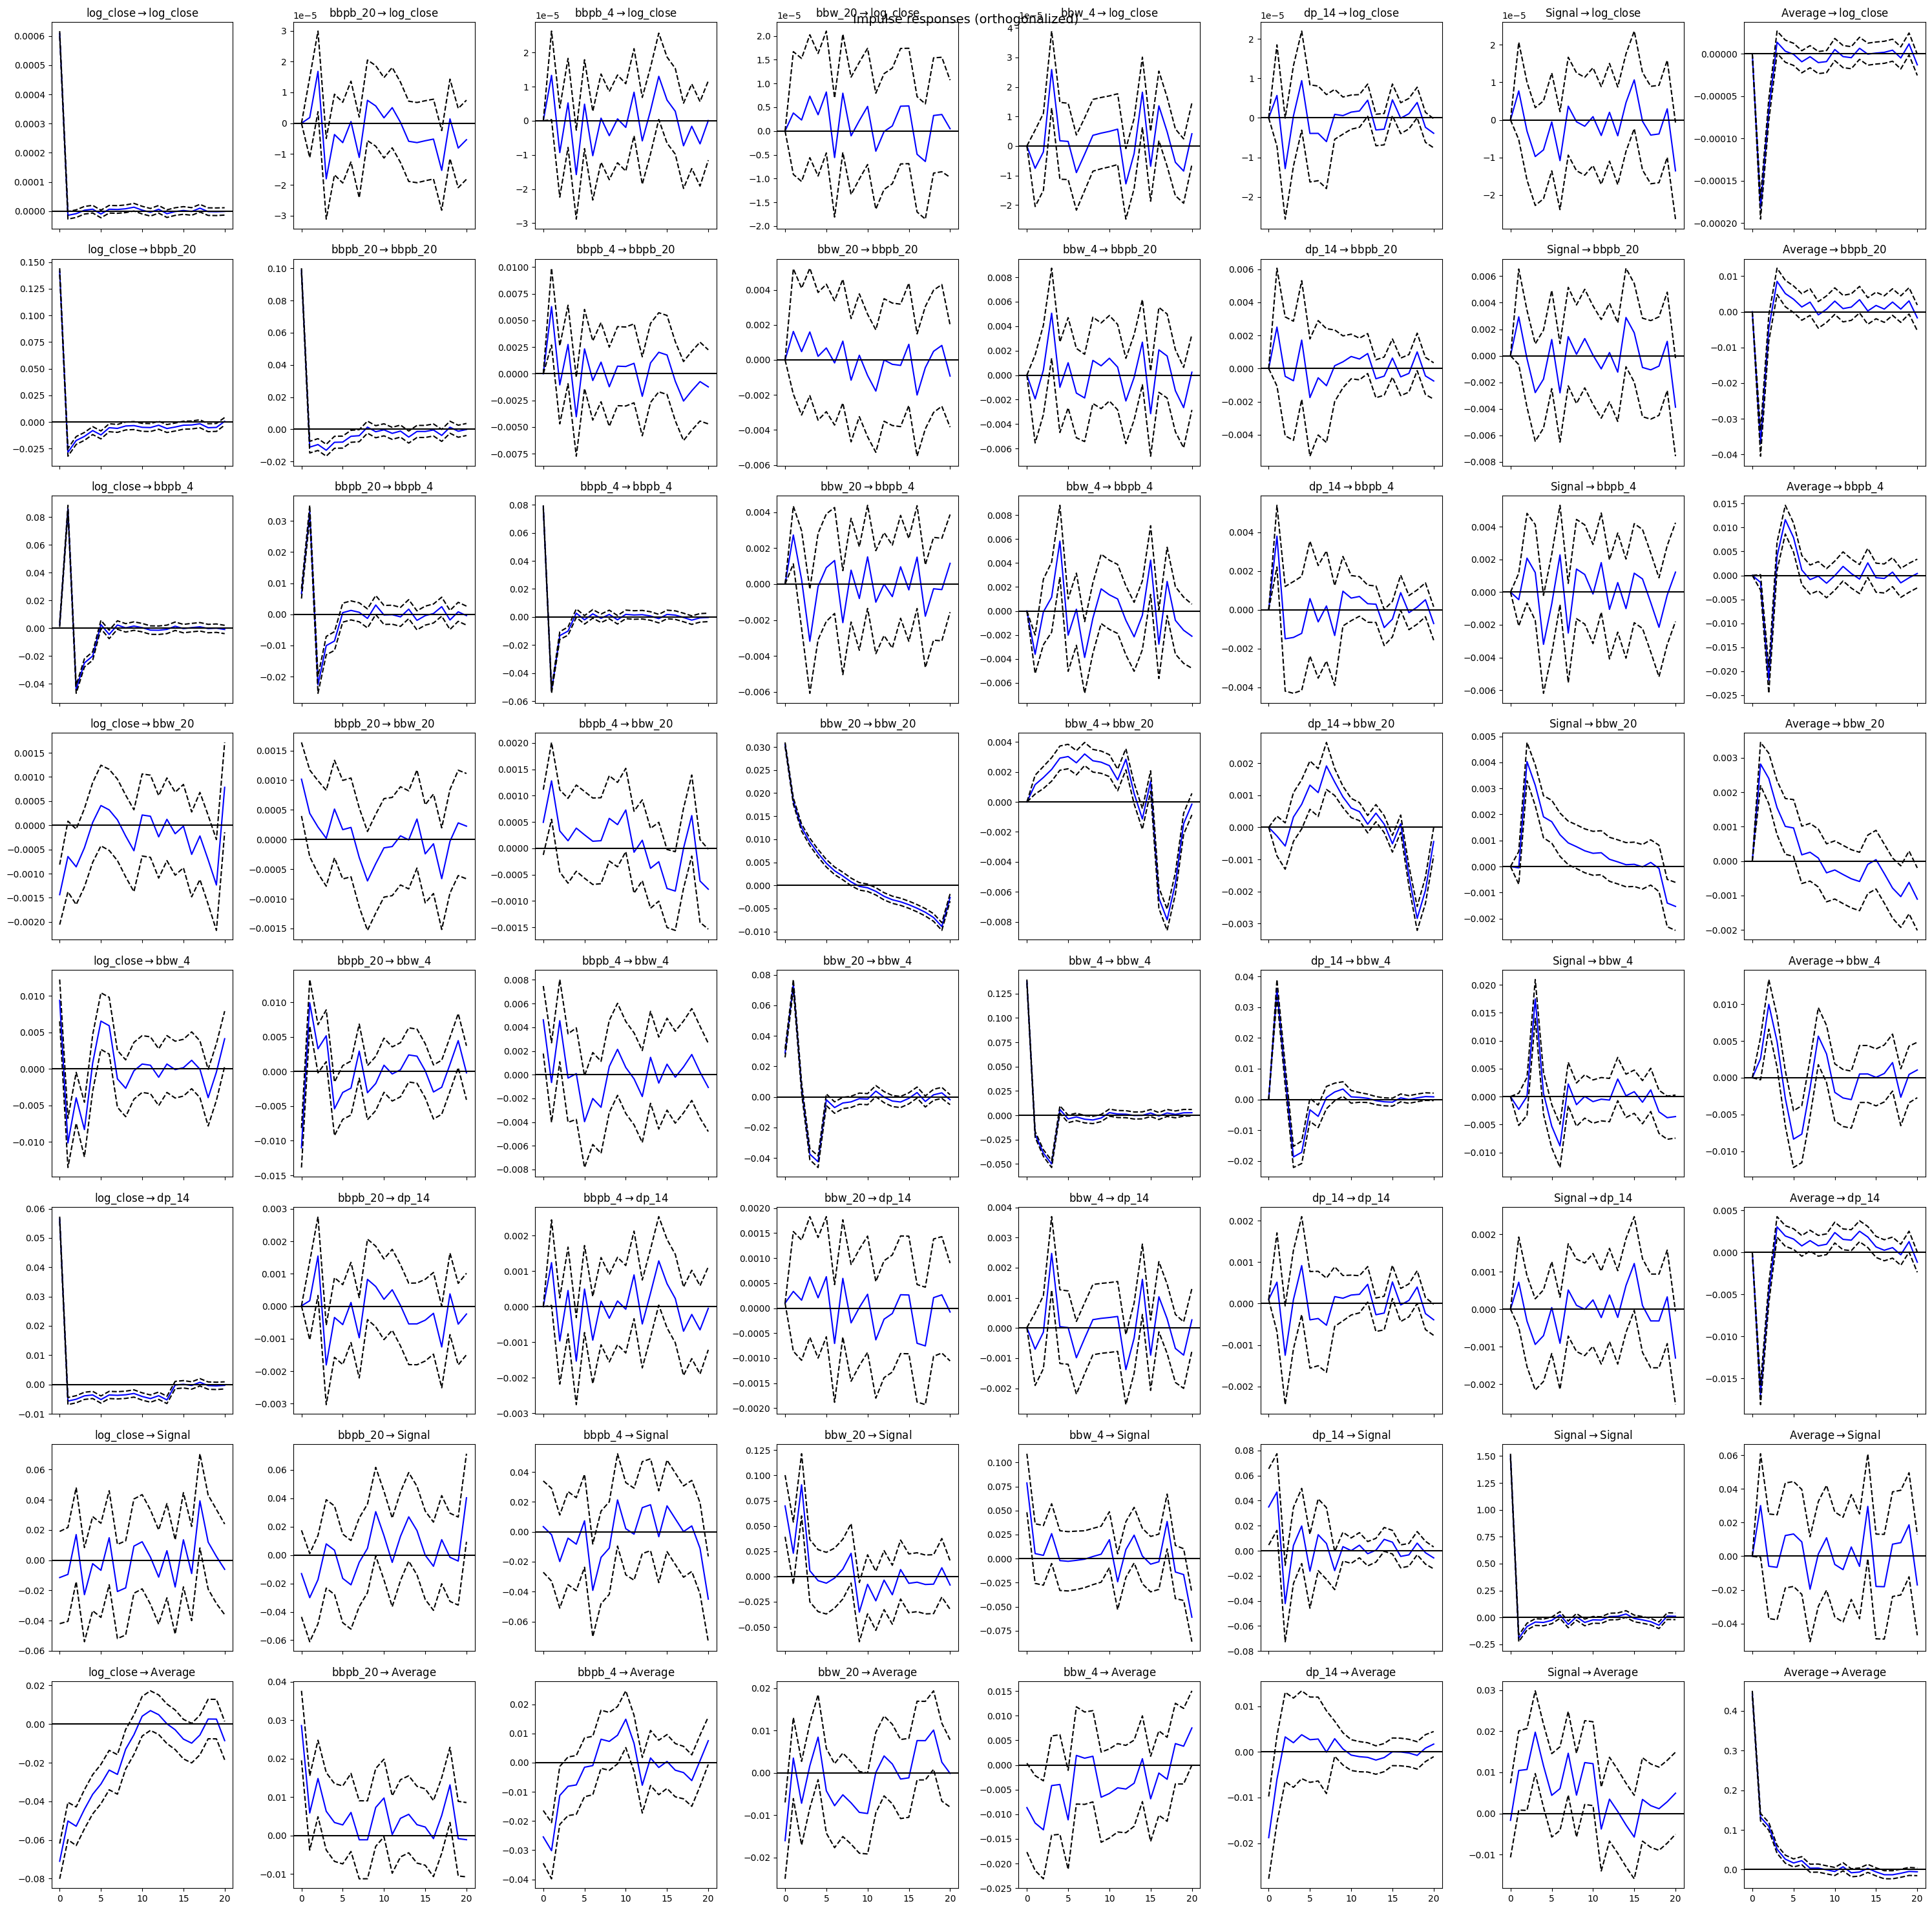

In [40]:
fig2 = irf.plot(orth=True)          # 결과를 변수에 받기
fig2.set_size_inches(30, 30)    # 그림 크기 키우기
fig2.tight_layout()            # 여백 정리

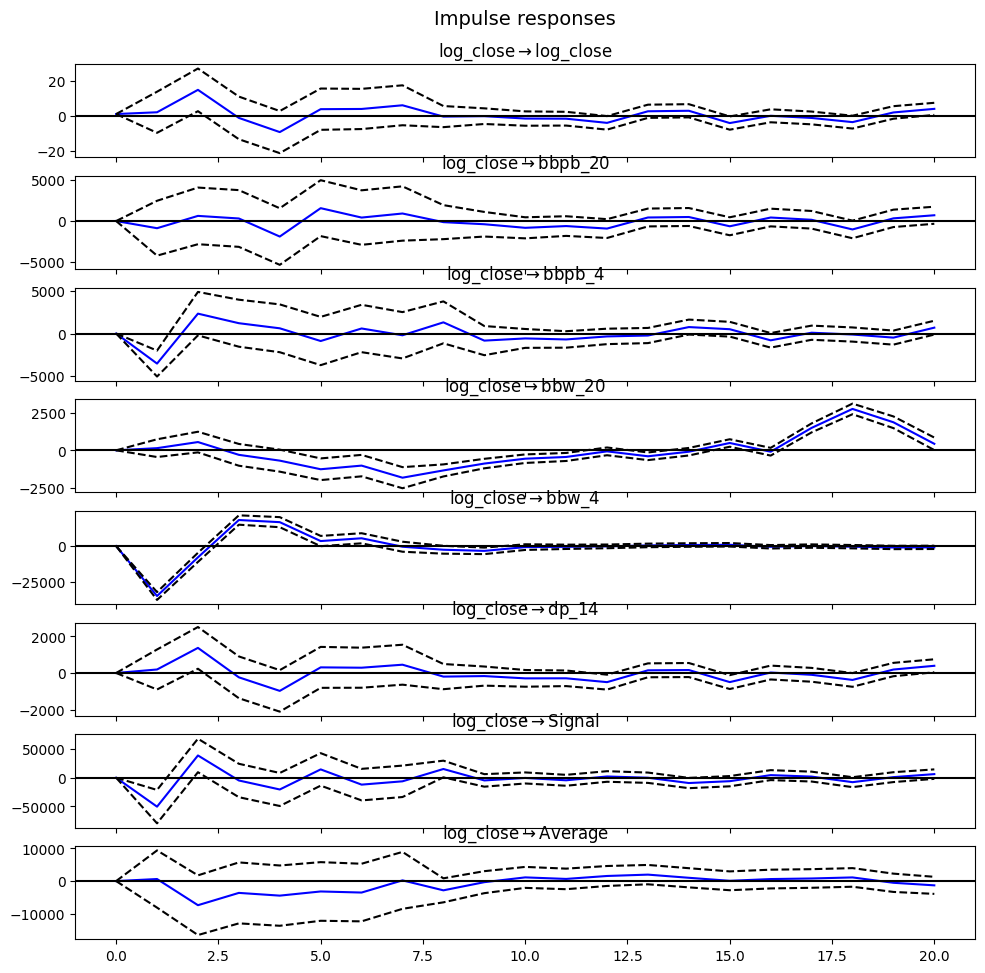

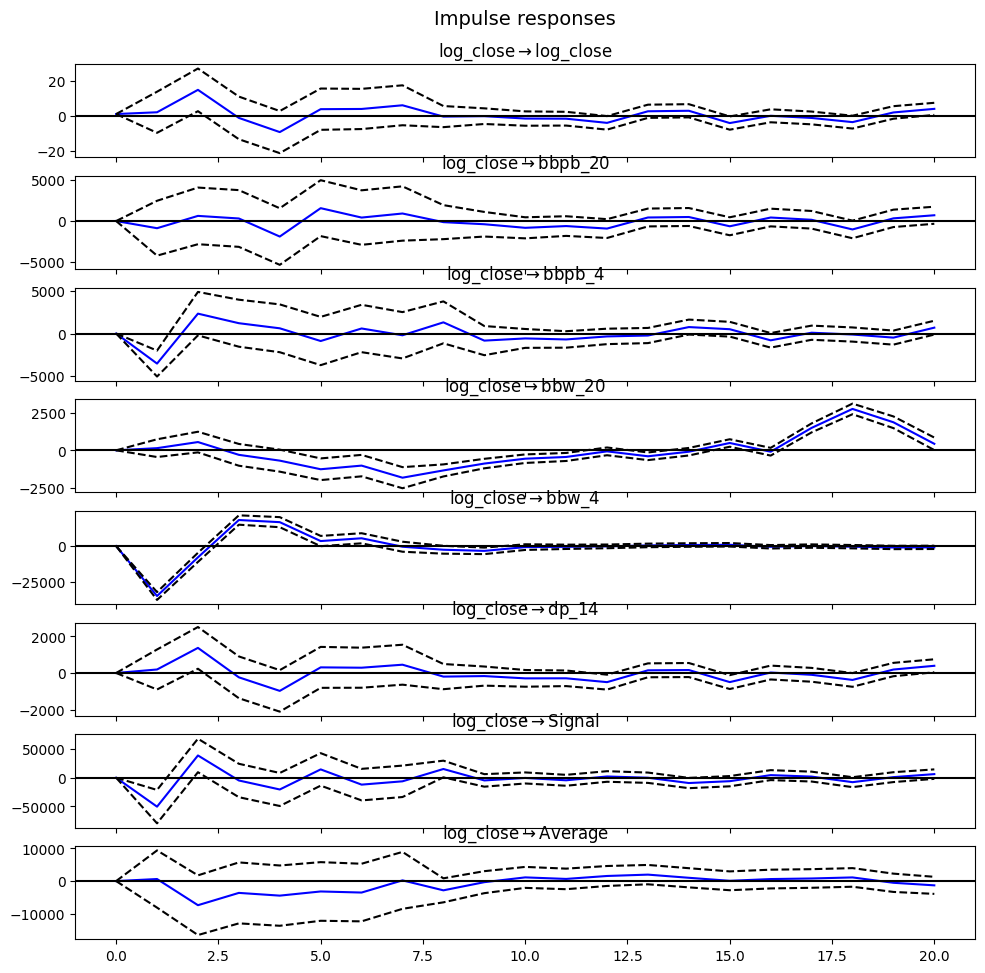

In [41]:
irf.plot(impulse='log_close')

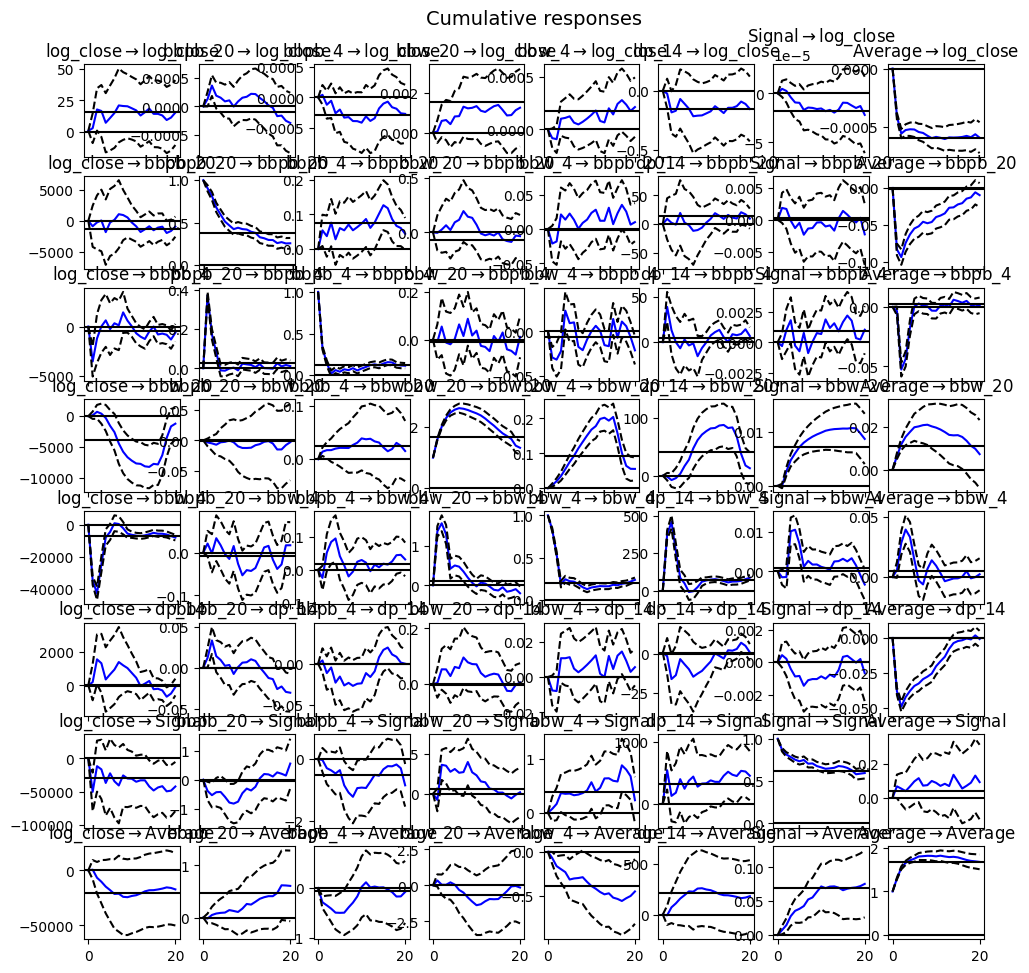

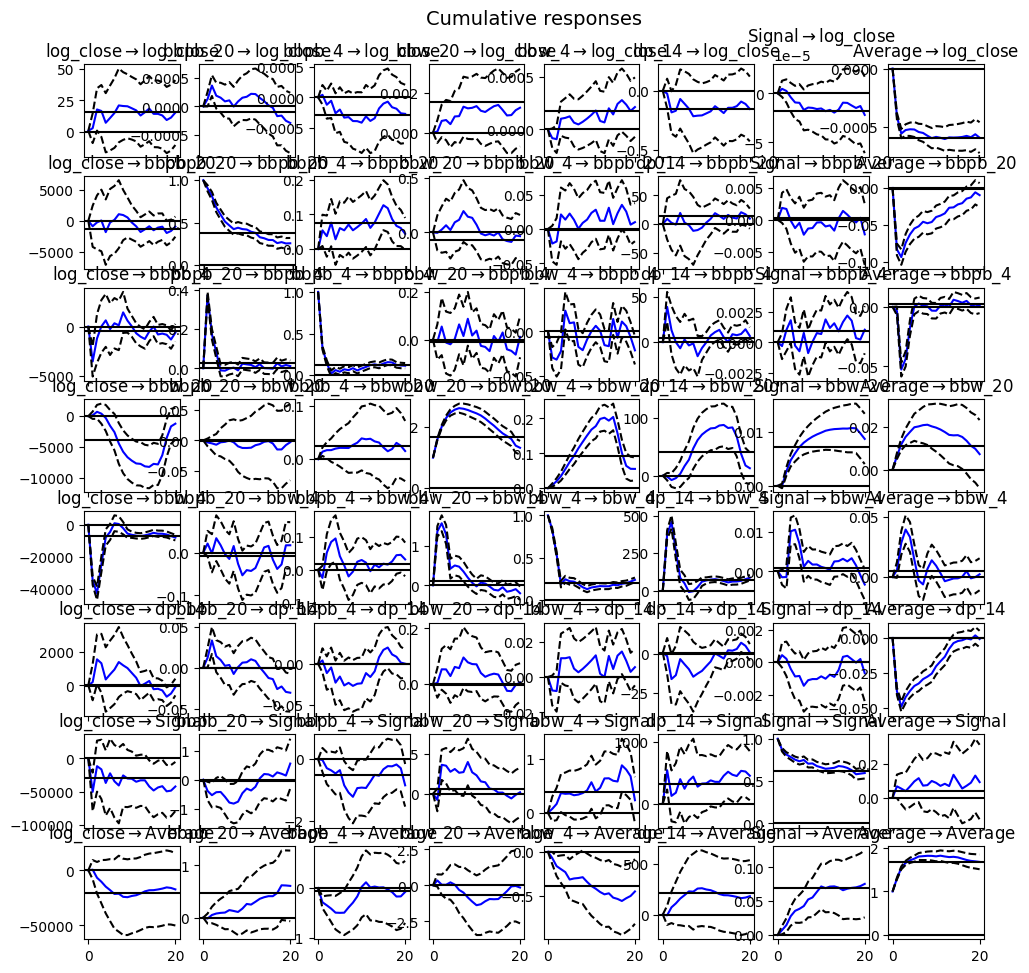

In [27]:
irf.plot_cum_effects(orth=False)

In [28]:
fevd.summary()

FEVD for log_close
      log_close   bbpb_20    bbpb_4    bbw_20     bbw_4     dp_14    Signal   Average
0      1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1      0.916548  0.000008  0.000439  0.000035  0.000142  0.000080  0.000147  0.082600
2      0.905407  0.000700  0.000645  0.000048  0.000150  0.000482  0.000167  0.092401
3      0.902418  0.001488  0.000710  0.000178  0.001786  0.000481  0.000399  0.092540
4      0.901468  0.001519  0.001314  0.000206  0.001791  0.000697  0.000554  0.092451
5      0.901163  0.001614  0.001371  0.000370  0.001796  0.000735  0.000554  0.092398
6      0.900203  0.001613  0.001623  0.000445  0.001992  0.000771  0.000840  0.092514
7      0.899649  0.001911  0.001623  0.000598  0.002010  0.000858  0.000871  0.092480
8      0.899226  0.002043  0.001668  0.000600  0.002040  0.000859  0.000871  0.092691
9      0.898953  0.002118  0.001668  0.000611  0.002084  0.000860  0.000877  0.092830
10     0.898772  0.002125  0.001676

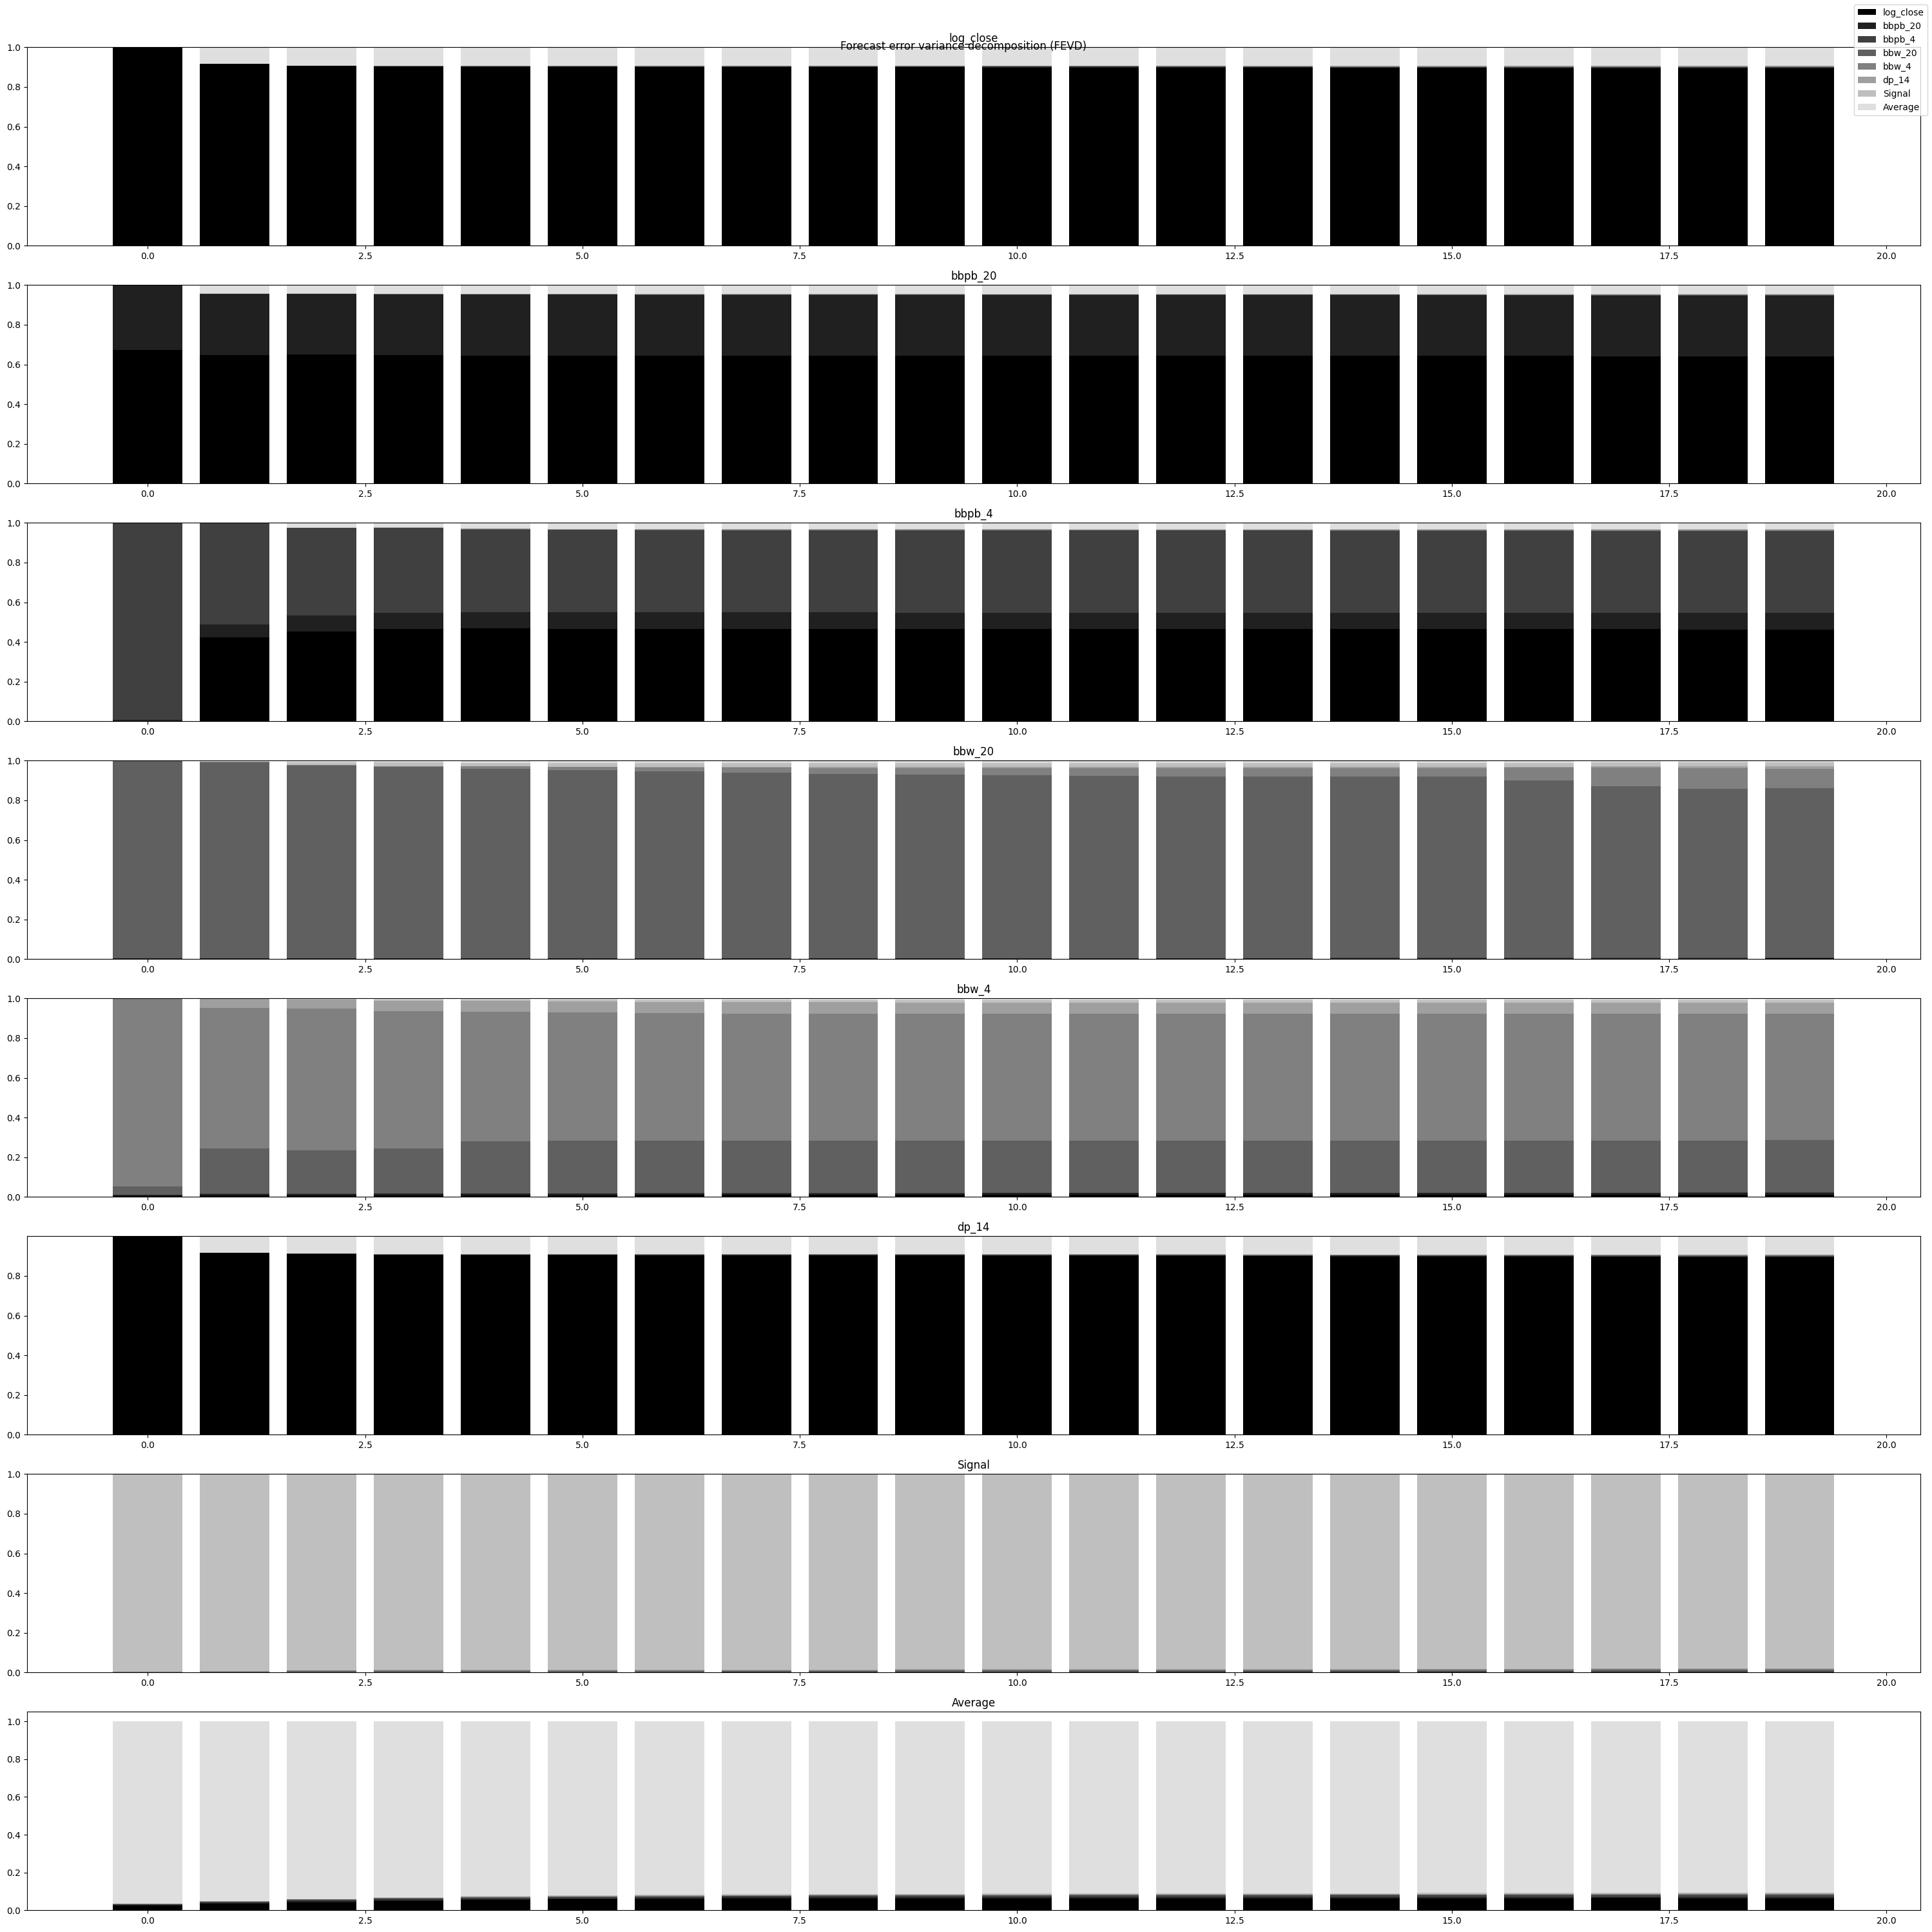

In [42]:
fig3 = fevd.plot()          # 결과를 변수에 받기
fig3.set_size_inches(30, 30)    # 그림 크기 키우기
fig3.tight_layout()   

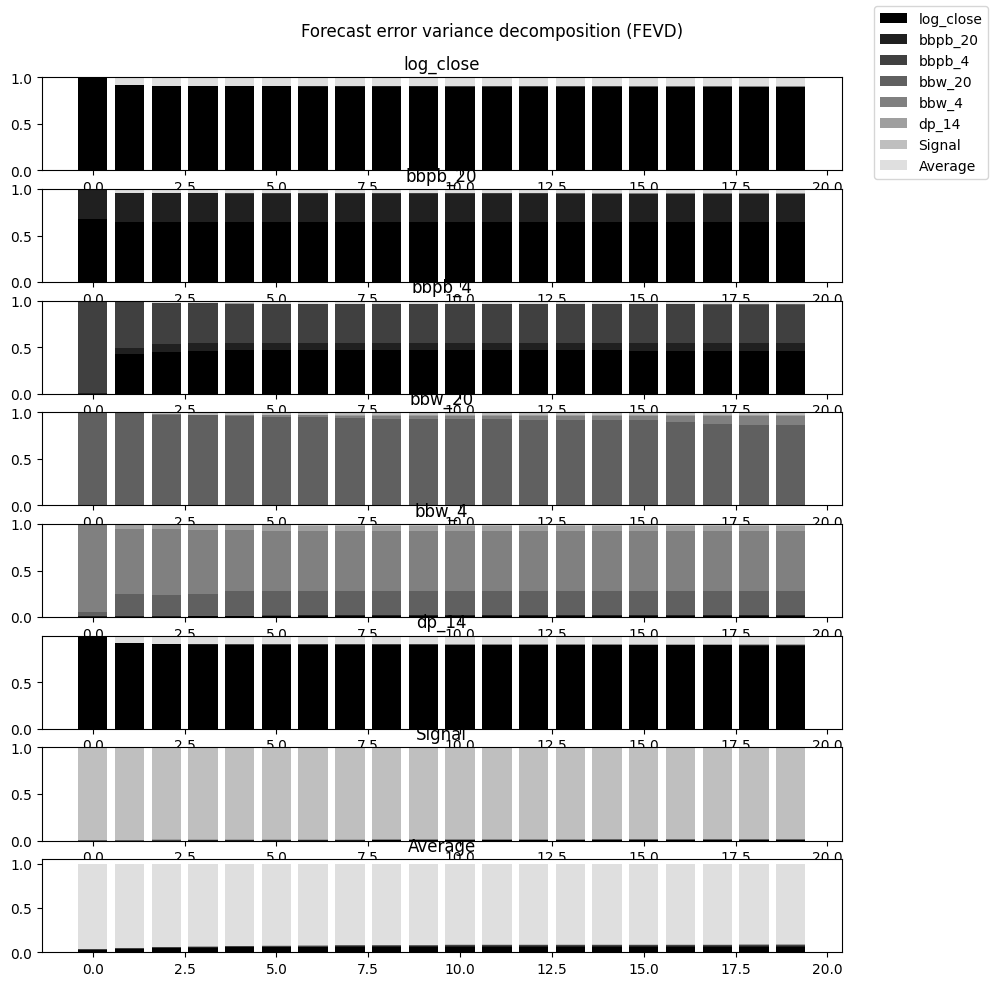

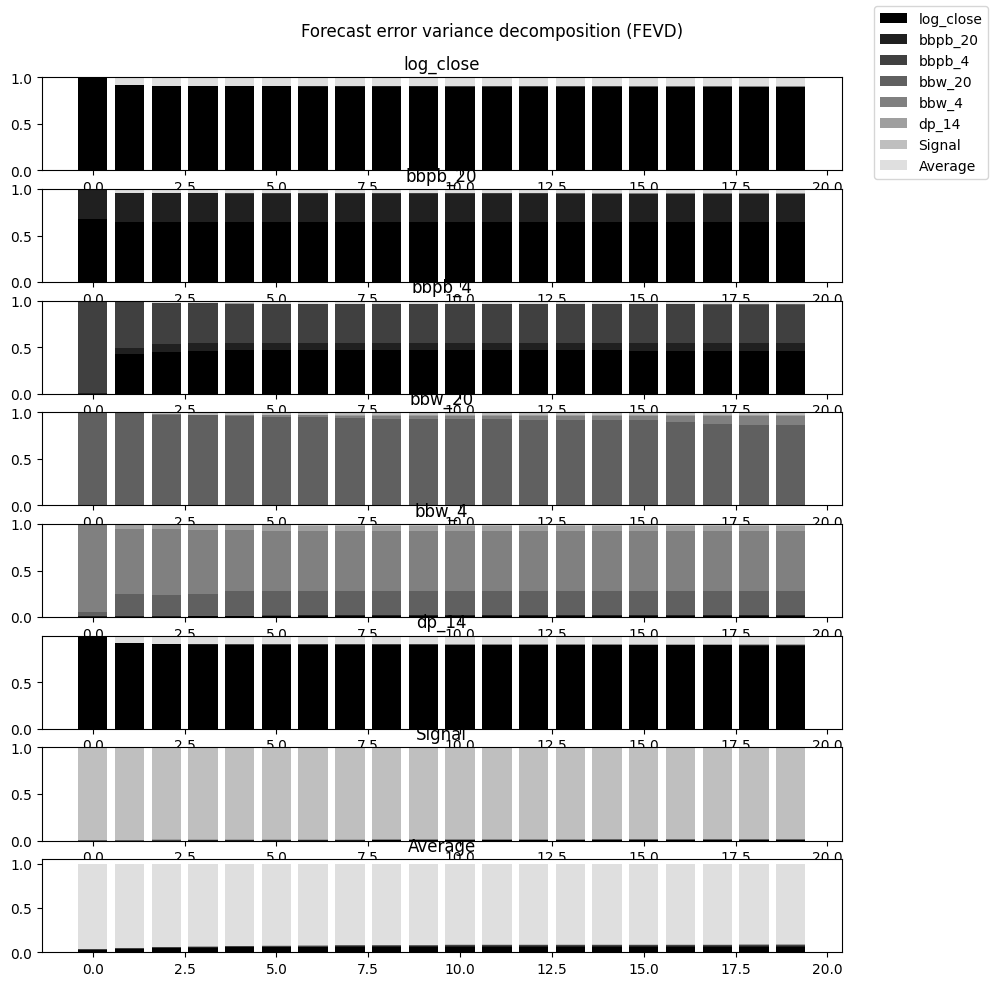

In [29]:
fevd.plot()

In [30]:
results.test_causality('log_close', ['Signal', 'Average'], kind='f')

In [31]:
results.test_normality()